<a href="https://colab.research.google.com/github/Park-hanna/BDA_study/blob/main/NLP/RNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html

In [ ]:
# $ python predict.py Hinton
# (-0.47) Scottish
# (-1.52) English
# (-3.57) Irish

# $ python predict.py Schmidhuber
# (-0.19) German
# (-2.48) Czech
# (-2.68) Dutch

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('/content/drive/MyDrive/Data/data/data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# 유니코드 문자열을 ASCII로 변환, https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# 각 언어의 이름 목록인 category_lines 사전 생성
category_lines = {}
all_categories = []

# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('/content/drive/MyDrive/Data/data/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['/content/drive/MyDrive/Data/data/data/names/Greek.txt', '/content/drive/MyDrive/Data/data/data/names/Italian.txt', '/content/drive/MyDrive/Data/data/data/names/Polish.txt', '/content/drive/MyDrive/Data/data/data/names/Czech.txt', '/content/drive/MyDrive/Data/data/data/names/Arabic.txt', '/content/drive/MyDrive/Data/data/data/names/Korean.txt', '/content/drive/MyDrive/Data/data/data/names/Spanish.txt', '/content/drive/MyDrive/Data/data/data/names/Portuguese.txt', '/content/drive/MyDrive/Data/data/data/names/Chinese.txt', '/content/drive/MyDrive/Data/data/data/names/Irish.txt', '/content/drive/MyDrive/Data/data/data/names/Russian.txt', '/content/drive/MyDrive/Data/data/data/names/German.txt', '/content/drive/MyDrive/Data/data/data/names/Dutch.txt', '/content/drive/MyDrive/Data/data/data/names/English.txt', '/content/drive/MyDrive/Data/data/data/names/Scottish.txt', '/content/drive/MyDrive/Data/data/data/names/Japanese.txt', '/content/drive/MyDrive/Data/data/data/names/French.txt', '/co

In [ ]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [ ]:
import torch

def letterToIndex(letter):
  return all_letters.find(letter)

def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)] = 1
  return tensor

def lineToTensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1

  return tensor

print(letterToTensor('J'))
print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [ ]:
import torch.nn as nn

class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()

    self.hidden_size = hidden_size

    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9856, -2.9612, -2.9046, -2.9760, -2.8550, -2.8996, -2.8898, -2.7667,
         -2.9566, -2.7775, -2.8712, -2.8843, -2.8958, -2.9448, -2.9275, -2.8997,
         -2.8160, -2.8489]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Portuguese', 7)


In [ ]:
import random

def randomChoice(l):
  return l[random.randint(0, len(l)-1)]

def randomTrainingExample():
  category = randomChoice(all_categories)
  line = randomChoice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor = lineToTensor(line)
  return category, line, category_tensor, line_tensor

for i in range(10):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  print('category =', category, '/ line = ',line)

category = Portuguese / line =  Ferreira
category = Dutch / line =  Leeuwenhoek
category = Scottish / line =  Jamieson
category = Portuguese / line =  Coelho
category = Dutch / line =  Snijder
category = Irish / line =  Farrell
category = Russian / line =  Vinnik
category = Arabic / line =  Haddad
category = Korean / line =  Chung
category = English / line =  Millard


In [ ]:
criterion = nn.NLLLoss()

In [ ]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
  hidden = rnn.initHidden()

  rnn.zero_grad()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  loss = criterion(output, category_tensor)
  loss.backward()

  for p in rnn.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []

def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m,s)

start = time.time()

for iter in range(1, n_iters + 1):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output, loss = train(category_tensor, line_tensor)
  current_loss += loss

  if iter % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = correct = '✓' if guess == category else '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

  if iter % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0

5000 5% (0m 8s) 2.5575 Yoon / Korean ✓
10000 10% (0m 14s) 1.0963 Inihara / Japanese ✓
15000 15% (0m 21s) 1.0996 Kamioka / Japanese ✓
20000 20% (0m 28s) 0.7384 Tong / Chinese ✓
25000 25% (0m 34s) 2.0658 O'Grady / Japanese ✗ (Irish)
30000 30% (0m 41s) 1.4944 Shamon / Arabic ✓
35000 35% (0m 47s) 2.9059 Malafa / Arabic ✗ (Czech)
40000 40% (0m 55s) 2.7108 Bustos / Greek ✗ (Spanish)
45000 45% (1m 1s) 3.8235 Deeb / Dutch ✗ (Arabic)
50000 50% (1m 8s) 1.7049 Ellrott / French ✗ (English)
55000 55% (1m 14s) 1.0150 Romao / Portuguese ✓
60000 60% (1m 22s) 1.8923 Teoh / Vietnamese ✗ (Chinese)
65000 65% (1m 28s) 5.6520 Gets / Dutch ✗ (Russian)
70000 70% (1m 35s) 0.2976 Reynder / Dutch ✓
75000 75% (1m 41s) 0.1916 Mochulov / Russian ✓
80000 80% (1m 49s) 2.2861 Toman / Irish ✗ (Czech)
85000 85% (1m 55s) 1.8674 Tholberg / Russian ✗ (Dutch)
90000 90% (2m 2s) 0.2891 Ta / Vietnamese ✓
95000 95% (2m 9s) 0.6823 Pitersky / Russian ✓
100000 100% (2m 16s) 4.9818 Durnovo / Portuguese ✗ (Russian)


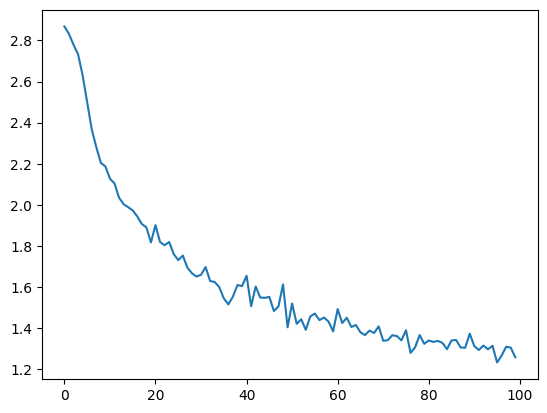

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

<ipython-input-16-3e5c3f54ed8f>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation = 90)
<ipython-input-16-3e5c3f54ed8f>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


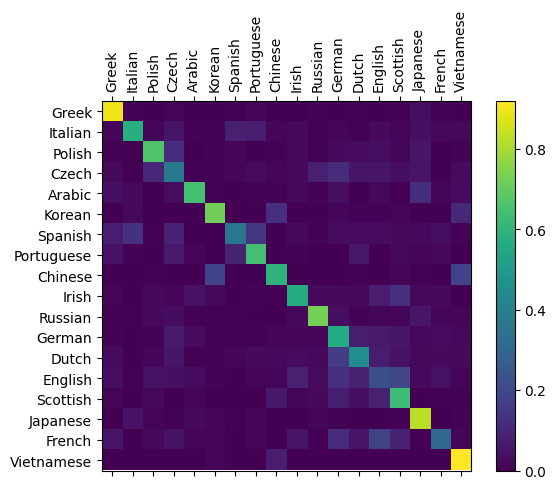

In [ ]:
# confusion procession
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

def evaluate(line_tensor):
  hidden = rnn.initHidden()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

for i in range(n_confusion):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output = evaluate(line_tensor)
  guess, guess_i = categoryFromOutput(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] += 1

for i in range(n_categories):
  confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation = 90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [ ]:
def predict(input_line, n_predictions = 3):
  print('\n> %s' %input_line)
  with torch.no_grad():
    output = evaluate(lineToTensor(input_line))

    topv, topi = output.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
      value = topv[0][i].item()
      category_index = topi[0][i].item()
      print('(%.2f) %s' %(value, all_categories[category_index]))
      predictions.append([value, all_categories[category_index]])


predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.43) Russian
(-1.89) Czech
(-2.25) Polish

> Jackson
(-0.11) Scottish
(-2.79) English
(-4.22) Russian

> Satoshi
(-0.99) Japanese
(-1.37) Italian
(-2.63) Polish
